In [1]:
import pycaret
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
from pycaret.classification import *

In [3]:
# check pycaret version 
pycaret.__version__

'3.3.2'

In [4]:
data_path = Path("../Titanic_data/train.csv")

data = pd.read_csv(data_path)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


In [7]:
# init setup on exp
exp.setup(data, target = 'Survived', 
          session_id = 108,
          ignore_features = ['PassengerId'])


,Description,Value
0,Session id,108
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 13)"
5,Transformed train set shape,"(623, 13)"
6,Transformed test set shape,"(268, 13)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,5


In [8]:
# compare models 
best_model = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8330,0.8761,0.7040,0.8436,0.7626,0.6359,0.6465,0.2540
ridge,Ridge Classifier,0.7672,0.8730,0.4728,0.8544,0.6012,0.4597,0.5023,0.0080
knn,K Neighbors Classifier,0.7207,0.7414,0.5987,0.6442,0.6158,0.3988,0.4021,0.0110
et,Extra Trees Classifier,0.7190,0.7887,0.3469,0.8249,0.4798,0.3318,0.3929,0.0170
svm,SVM - Linear Kernel,0.6821,0.7512,0.6290,0.5543,0.5666,0.3391,0.3573,0.0080
lda,Linear Discriminant Analysis,0.6260,0.5393,0.0348,0.0800,0.0485,0.0335,0.0389,0.0080
nb,Naive Bayes,0.6164,0.6130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080
rf,Random Forest Classifier,0.6164,0.8546,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190
qda,Quadratic Discriminant Analysis,0.6164,0.5504,0.0000,0.0000,0.0000,0.0000,0.0000,0.0080


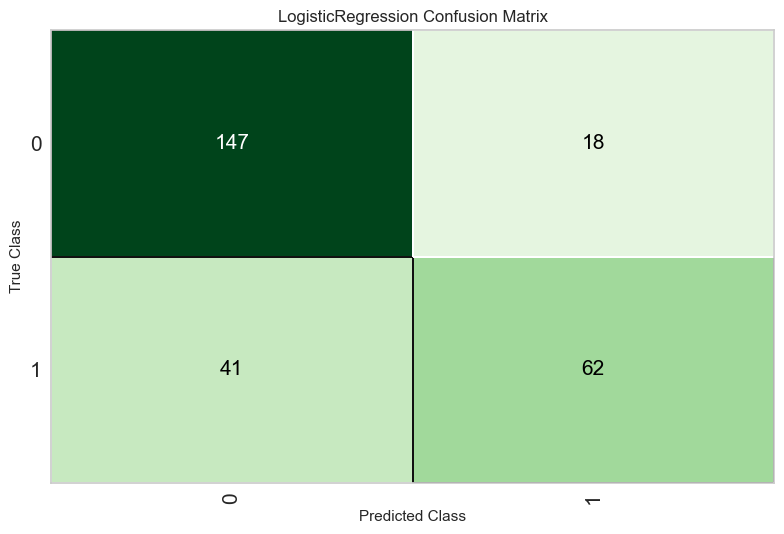

In [9]:
exp.plot_model(best_model, plot = 'confusion_matrix')

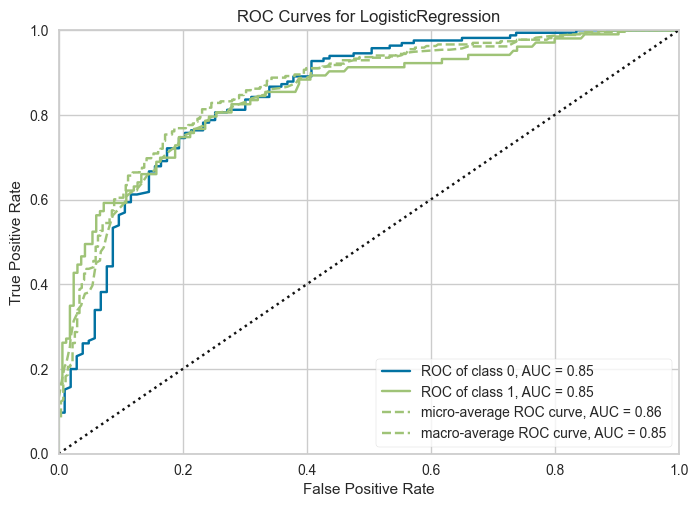

In [11]:
exp.plot_model(best_model, plot = 'auc', verbose=False)

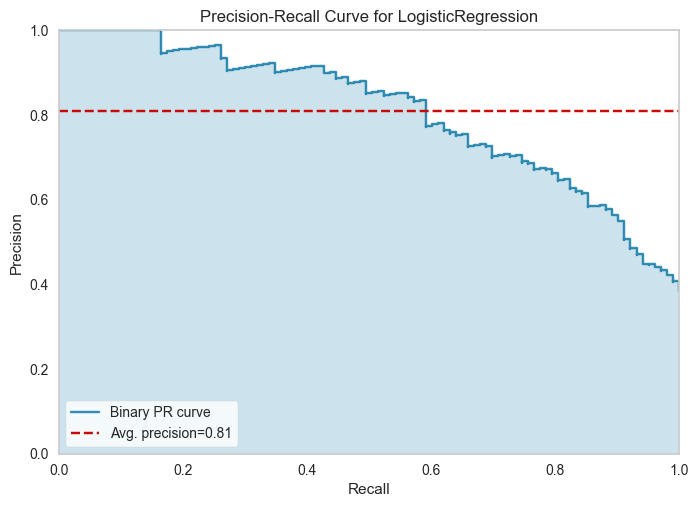

In [12]:
exp.plot_model(best_model, plot='pr', verbose=False)

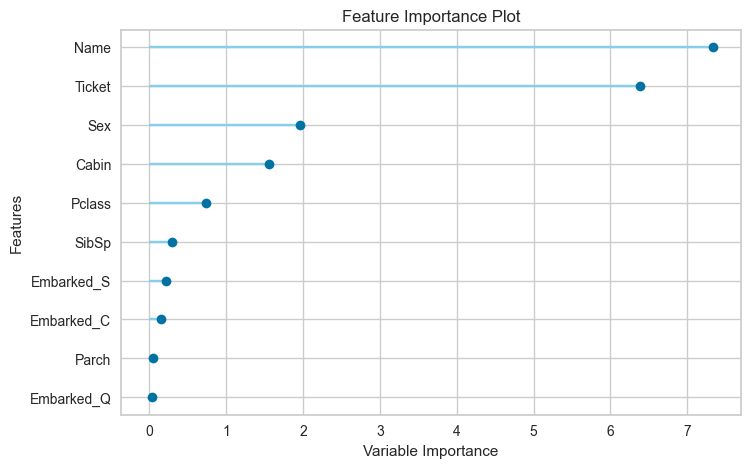

In [13]:
exp.plot_model(best_model, plot='feature', verbose=False)